In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('train.csv')


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
data.drop(labels=['Name', 'Ticket', 'Fare'], axis=1, inplace=True)

In [6]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,NaN,S
887,888,1,1,female,19.0,0,0,B42,S
888,889,0,3,female,NaN,1,2,NaN,S
889,890,1,1,male,26.0,0,0,C148,C


In [7]:
data['Cabin'].isna().sum()

687

In [8]:
data.drop(labels=['Cabin'], inplace=True, axis=1)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

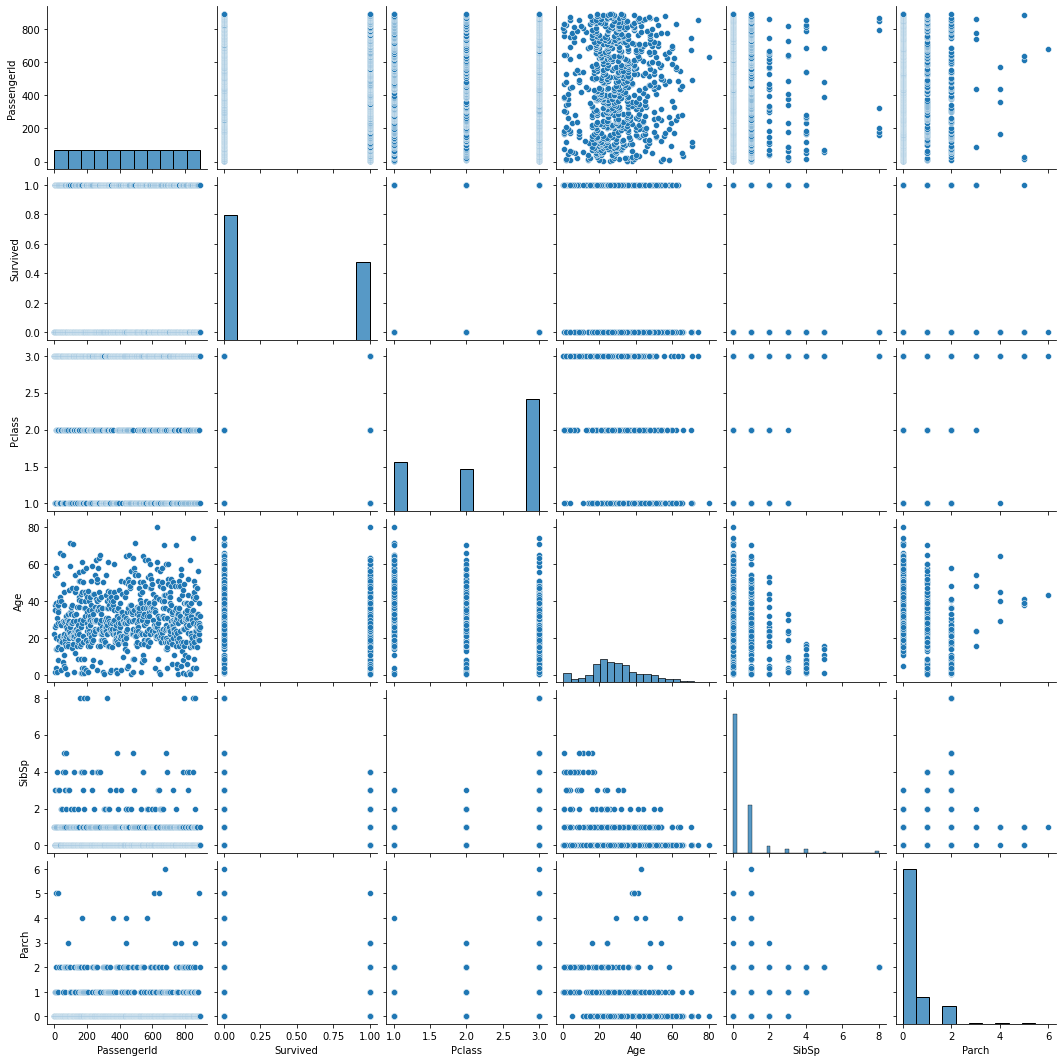

In [11]:
sns.pairplot(data)

<AxesSubplot:>

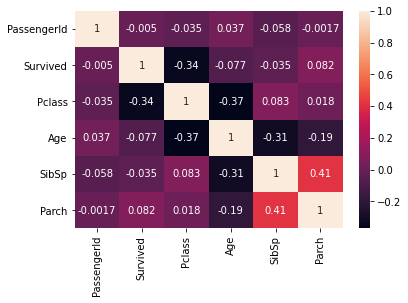

In [12]:
sns.heatmap(data.corr(),annot=True)

In [13]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [14]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [15]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.000000,1,0,S
1,2,1,1,female,38.000000,1,0,C
2,3,1,3,female,26.000000,0,0,S
3,4,1,1,female,35.000000,1,0,S
4,5,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,S
887,888,1,1,female,19.000000,0,0,S
888,889,0,3,female,29.699118,1,2,S
889,890,1,1,male,26.000000,0,0,C


In [16]:

data = pd.get_dummies(data, columns = ['Embarked', 'Sex'],drop_first=True)
data.drop(labels=['PassengerId'], axis=1, inplace=True)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [18]:
models = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB', 'LogisticRegression', 'train_test_split', 'GridSearchCV']

In [19]:
classifier = {
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression(max_iter=2000),
}

In [20]:
x = data.drop(labels=['Survived'], axis=1)
y = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape

((712, 7), (712,))

In [21]:
score = {}
for model, name in zip(classifier, models):
    model.fit(x_train, y_train)
    score[name] = model.score(x_test, y_test)
score

{'KNeighborsClassifier': 0.7988826815642458,
 'SVC': 0.770949720670391,
 'DecisionTreeClassifier': 0.6201117318435754,
 'RandomForestClassifier': 0.776536312849162,
 'GaussianNB': 0.7486033519553073,
 'LogisticRegression': 0.7597765363128491}

In [22]:
clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators' : [100, 50, 500]
}, cv=5, return_train_score=False)
clf.fit(x_train, y_train)
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.224859,0.011921,0.020273,0.004096,100,{'n_estimators': 100},0.818182,0.832168,0.746479,0.767606,0.718310,0.776549,0.042902,3
1,0.128093,0.017097,0.010218,0.007237,50,{'n_estimators': 50},0.818182,0.846154,0.774648,0.781690,0.725352,0.789205,0.041057,1
2,1.060275,0.052126,0.082039,0.006940,500,{'n_estimators': 500},0.818182,0.825175,0.767606,0.760563,0.718310,0.777967,0.039535,2


In [23]:
clf.best_score_, clf.best_params_

(0.789205161036147, {'n_estimators': 50})

In [24]:
final_model = RandomForestClassifier(n_estimators=500)
final_model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=500)

In [25]:
from sklearn.metrics import accuracy_score
pred = final_model.predict(x_test)


In [26]:
score = accuracy_score(y_test, pred)
score

0.7821229050279329

In [27]:
df = pd.read_csv('test.csv')
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
d = df.drop(labels=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

In [28]:
d = pd.get_dummies(d, columns = ['Embarked', 'Sex'],drop_first=True)
len(d)

418

In [29]:
pred = final_model.predict(d)
len(pred)

418

In [33]:
sub = pd.DataFrame({
    'PassengerId': df['PassengerId'],
    'Survived':pred
})

In [34]:
sub.to_csv('subimmision', index=False)